In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Daten einlesen
df = pd.read_csv('results/experiment_summary.csv')
df.head()


,variant,seed,episode,return
0,Fixed,9,1,3523.219924
1,Fixed,9,2,11181.296059
2,Fixed,9,3,19895.973468
3,Fixed,9,4,17834.703229
4,Fixed,9,5,18947.956096


In [10]:
# Statistiken berechnen
stats = (
    df
    .groupby(['variant', 'episode'])['return']
    .agg(mean='mean', std='std')
    .reset_index()
)

stats.head()

,variant,episode,mean,std
0,EZ,1,16099.429239,5409.078039
1,EZ,2,25327.849278,5639.737372
2,EZ,3,21183.864630,3801.823529
3,EZ,4,22147.189742,5144.818831
4,EZ,5,23203.634738,3724.387608


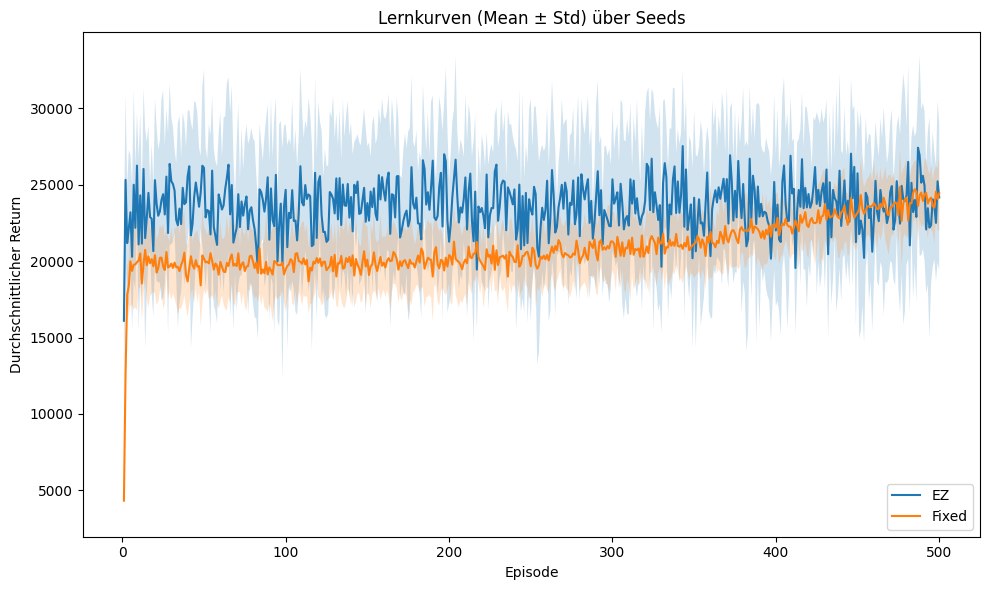

In [11]:
# Lernkurven mit Shading (Mean ± Std)
plt.figure(figsize=(10,6))
for variant, sub in stats.groupby('variant'):
    plt.plot(sub['episode'], sub['mean'], label=variant)
    plt.fill_between(
        sub['episode'],
        sub['mean'] - sub['std'],
        sub['mean'] + sub['std'],
        alpha=0.2
    )
plt.xlabel('Episode')
plt.ylabel('Durchschnittlicher Return')
plt.title('Lernkurven (Mean ± Std) über Seeds')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_30339/234770404.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_fixed, data_ez], labels=['Fixed', 'EZ'])


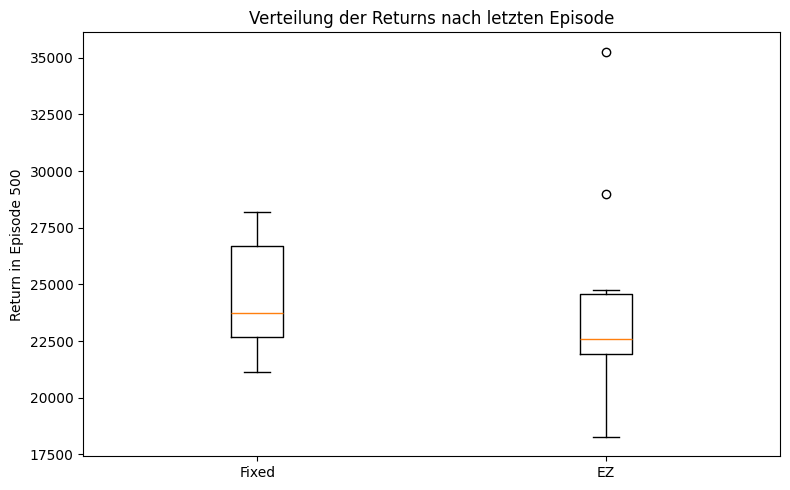

In [12]:
# End-Return Boxplot nach 500 Episoden
# Filter für letzte Episode
last = df[df['episode'] == df['episode'].max()]

plt.figure(figsize=(8,5))
data_fixed = last[last['variant']=='Fixed']['return']
data_ez    = last[last['variant']=='EZ']['return']
plt.boxplot([data_fixed, data_ez], labels=['Fixed', 'EZ'])
plt.ylabel('Return in Episode ' + str(df['episode'].max()))
plt.title('Verteilung der Returns nach letzten Episode')
plt.tight_layout()
plt.show()

In [13]:
# Konvergenzzeitpunkt analysieren
# Beispiel: Episode, ab der jeder Lauf ≥ 95% des finalen Mittelwerts erreicht
threshold = 0.95 * stats[stats['episode']==stats['episode'].max()].set_index('variant')['mean']
conv = {}
for variant in ['Fixed','EZ']:
    df_var = df[df['variant']==variant]
    final_mean = threshold[variant]
    conv_points = df_var.groupby('seed').apply(
        lambda sub: sub[sub['return'] >= final_mean]['episode'].min()
    )
    conv[variant] = conv_points

# Zeige Konvergenz-Episoden
import pandas as pd
pd.DataFrame(conv)

/tmp/ipykernel_30339/2187350330.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conv_points = df_var.groupby('seed').apply(
/tmp/ipykernel_30339/2187350330.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conv_points = df_var.groupby('seed').apply(


,Fixed,EZ
seed,,
9,339,2
10,141,2
11,380,2
12,6,2
13,11,1
14,25,2
15,405,2
16,265,4
17,407,5
